# Exploring Data to Get High Level Statistics

In [95]:
from __future__ import division
#import required modules
import pandas as pd 
from IPython.display import display
import numpy as np
#matplotlib for additional coustomization
from matplotlib import pyplot as plt
%matplotlib inline

#seaborn for plotting and styling
import seaborn as sns

#todo: need to shift to plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
from plotly.graph_objs import *
from plotly import tools

sns.color_palette("muted")


# to supress printing of exponential notation in pandas
pd.options.display.float_format = '{:20,.2f}'.format

init_notebook_mode(connected=True)         # initiate notebook for offline plot

In [96]:
#helper functions
def getPecentage(df1, df2):
    return df1.shape[0] / df2.shape[0] * 100

def bold(text_to_bold):
    """
    Bolds given string.
    args:todo
    returns:todo
    """
    bold = "\033[1m"
    reset = "\033[0;0m"
    return bold + text_to_bold + reset

def count_plot(column, axis, df, percent='no', title='', figsize=(16,3)):
    total_rows = df.shape[0]
    plt.figure(figsize=figsize)
    plt.title(title)
    if axis == 'x':
        ax = sns.countplot(x=column, data=df)
    elif axis == 'y':
        ax = sns.countplot(y=column, data=df)
    
#     ax.title = title
    
    if percent == 'show' and axis != 'y':
        for p in ax.patches:
            height=p.get_height()
            percent = (height*100)/total_rows
            total_percent = (height*100)/totalrows
#             ax.text((p.get_x() + p.get_width()/2), p.get_height()+250, '{:1.1f} %'.format(percent), ha='center')
            ax.text((p.get_x() + p.get_width()/2), p.get_height()+0.2, '{:1.1f} %'.format(percent) + ' / ' + '{:1.1f} %'.format(total_percent), ha='center')

def stacked_chart(df, x, legend, title=None, barmode=None, xaxistitle=None, yaxistitle=None, normalize=None, figsize=(16,5)):
    
    title = "" if title is None else title
    xaxistitle = "" if xaxistitle is None else xaxistitle
    yaxistitle = "" if yaxistitle is None else yaxistitle
    normalize = False if normalize is None else normalize
    barmode = 'stack' if barmode is None else barmode
    
    ct = pd.crosstab(index=df[x], columns=df[legend], normalize=normalize).rename_axis(None, axis=1).reset_index()
    legend_list = ct.columns[1:]
    
    #data for chart
    data = [Bar(x=ct[x], y=ct[col], name=str(col)) for col in legend_list]
    layout = Layout(title=title, barmode=barmode,
                   xaxis=dict(title=xaxistitle,showticklabels=True, type='category'),
                yaxis=dict(title=yaxistitle))
    
    fig = Figure(data=data, layout=layout)
    
    return fig

def factorplot(x_, col_, data_, title_=''):
    g = sns.factorplot(x=x_,
                   col=col_, 
                   data=data_, col_wrap=6, kind="count", size=4, aspect=0.7,
                   sharex=False
                  )
    plt.subplots_adjust(top=0.95)
    g.fig.suptitle(title_)
    # factorplot(x='restraint', cols='year', data=data)
    plt.show()

### Loading data

In [97]:
data = pd.read_csv('data/FARS.csv')
data = data.drop(labels=['Unnamed: 0'], axis=1)
print "Data shape:"
print "{} Rows x {} Columns".format(str(data.shape[0]), str(data.shape[1]))
data.head(10)

totalrows = len(data.index)

Data shape:
151158 Rows x 17 Columns


## Let's see the distribution of inimpact position

### inimpact: location code of initial impact


total impact points:  24


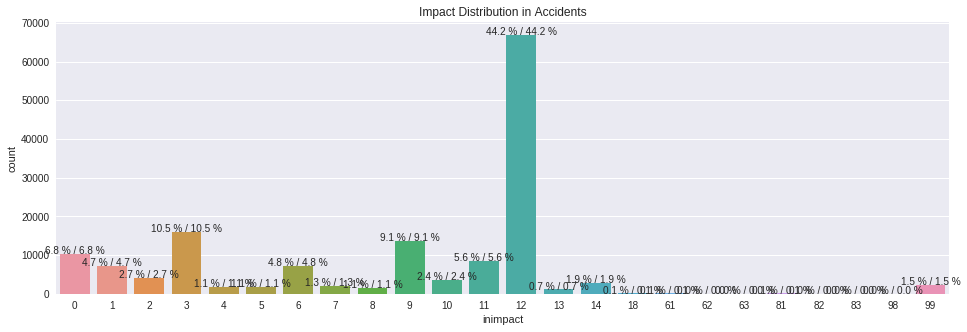

In [98]:
print 'total impact points: ', len(data.inimpact.value_counts().keys())
count_plot('inimpact', 'x', data, 'show', 'Impact Distribution in Accidents', figsize=(16,5))

**44%** of the accidents by the inimpact **12** (front)

**20%** by inimpact **3** and **9**

### Lets dig down more to see about 44% of the accidents by inimpact 12

In [99]:
filter_ = (data.inimpact == 12)
data_specific_inimpact = data[filter_]

### About Seatbelt (When inimpact12 hit from front and airbag didn't deploy)


#### Availability

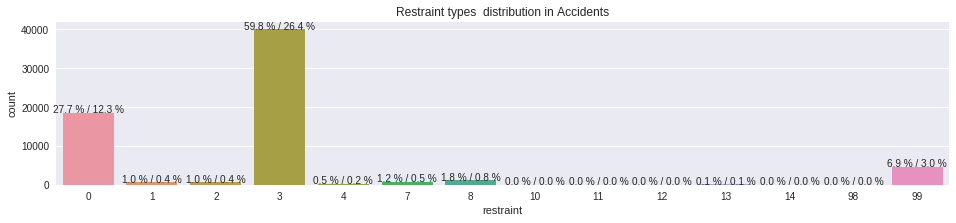

In [100]:
count_plot('restraint', 'x', data_specific_inimpact, 'show', \
           title='Restraint types  distribution in Accidents')

**60%** accidents when there was **Shoulder and Lab seatbelt** was available and **27%** where **none** was available

### Lets examine effect of seat belt
#### Stats for Passenger 

When seatbelt was fastened and airbag didn't deploy

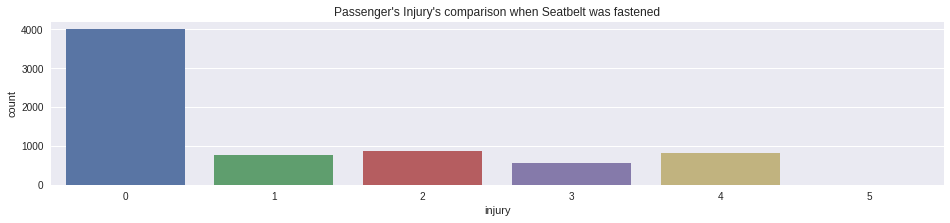

In [101]:
filter_p = (data_specific_inimpact.airbagDeploy == 'no') & (data_specific_inimpact.airbagAvail == 'yes') \
        & (data_specific_inimpact.Restraint == 'yes')
count_plot('injury', 'x', data_specific_inimpact[filter_p], \
           title='Passenger\'s Injury\'s comparison when Seatbelt was fastened')

When seatbelt wasn't fastened and aribag didn't deploy

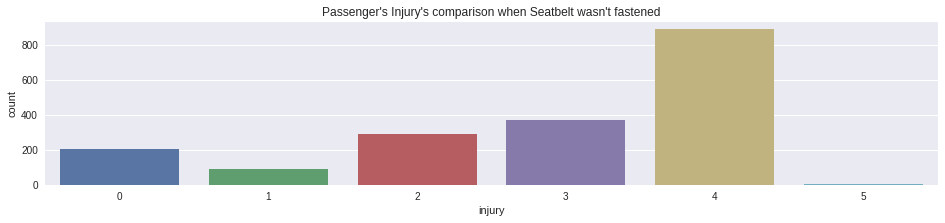

In [102]:
filter_p = (data_specific_inimpact.airbagDeploy == 'no') & (data_specific_inimpact.airbagAvail == 'yes') \
        & (data_specific_inimpact.Restraint == 'no')
count_plot('injury', 'x', data_specific_inimpact[filter_p], \
           title='Passenger\'s Injury\'s comparison when Seatbelt wasn\'t fastened')

Graphs clearly showed that seatbelt helped in reduction of deaths and injuries when seatbelt was fastened when car hit from front and airbag didn't deploy

#### Stats for Driver

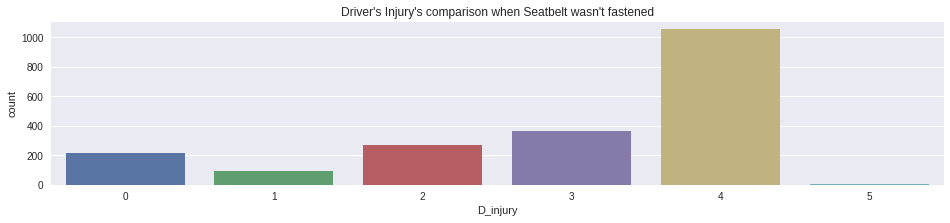

In [103]:
filter_p = (data_specific_inimpact.D_airbagDeploy == 'no') & (data_specific_inimpact.D_airbagAvail == 'yes') \
            & (data_specific_inimpact.D_Restraint == 'no')
count_plot('D_injury', 'x', data_specific_inimpact[filter_p], \
           title='Driver\'s Injury\'s comparison when Seatbelt wasn\'t fastened')

### Effects of  Airbag

#### Lets see the type of airbag that deployed in case of impact 12

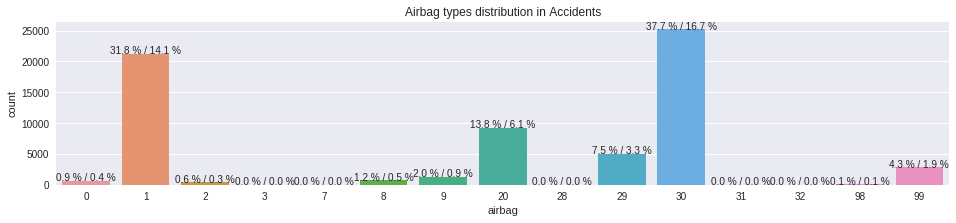

In [104]:
count_plot('airbag', 'x', data_specific_inimpact, 'show', title='Airbag types distribution in Accidents')

In **37%** cases, there **wasn't** any airbag **installed** in the car for **both** driver and the passenger.

In **31%** cases where airbag **1** (front) were the airbags that were **deployed**.

In **14%** cases, airbags were installed but **couldn't deployed**

### Airbags deployed successfully? (Available for both passenger and the driver and they DIED)

In [105]:
#injury vs others

passenger_injury_death = data[['airbagDeploy', 'injury']]
passenger_injury_death.loc[passenger_injury_death.injury != 4, 'injury'] = 'other'
passenger_injury_death.head()

,airbagDeploy,injury
0,no,other
1,no,other
2,no,other
3,yes,4
4,no,other


In [106]:
plt.figure(figsize=(16,3))
filter_ = (data.Restraint == 'no')
iplot(stacked_chart(df=data[filter_], x='airbagDeploy', legend='injury', xaxistitle='Airbag Deployment', yaxistitle='# of Accidents', \
                    title='Injury Analysis over Airbag Deployment when Seatbelt was NOT Fastened'))
filter_ = (data.Restraint == 'yes')
iplot(stacked_chart(df=data[filter_], x='airbagDeploy', legend='injury', xaxistitle='IAirbag Deployment', yaxistitle='# of Accidents', \
                    title='Injury Analysis over Airbag Deployment when seatbelt was Fastened'))


Graph shows **decrease in Death and increase in no injury** when seatbelt was **fastened**

In [199]:
filter_ = (data.Restraint == 'no')
iplot(stacked_chart(df=data[filter_], x='airbagDeploy', legend='injury', xaxistitle='Airbag Deployment', yaxistitle='Ratio', \
                    title='Injury Analysis over Airbag Deployment when seatbelt was NOT Fastened', normalize='index'))
filter_ = (data.Restraint == 'yes')
iplot(stacked_chart(df=data[filter_], x='airbagDeploy', legend='injury', xaxistitle='Airbag Deployment', yaxistitle='Ratio', \
                    title='Injury Analysis over Airbag Deployment when seatbelt was Fastened', normalize='index'))

On terms of ratio, we can clearly see the **decrease in death** and **increase in no injury** when seatbelt was **fastened**

# WHOLE DATA

### Death's stats

In [108]:
def addDeathType(row):
    if (row.D_injury != 4) & (row.injury != 4):
        return 'None'
    elif (row.D_injury == 4) & (row.injury == 4):
        return 'Both'
    elif (row.D_injury != 4) & (row.injury == 4):
        return 'Psngr'
    else:
        return 'Drvr'
data['death_type'] = data.apply(addDeathType, axis=1)

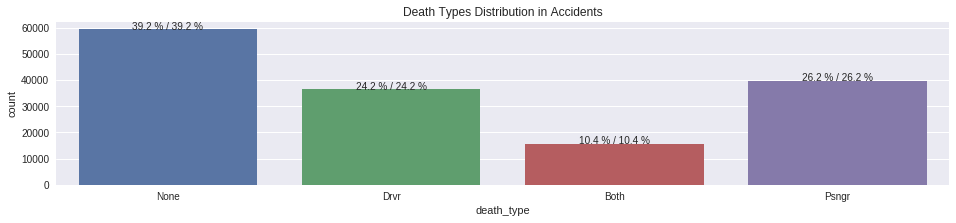

In [109]:
count_plot('death_type', 'x', data, 'show', title='Death Types Distribution in Accidents')

40% cases where no one died
Passengers' death ratios are more than drivers'

### Seat belts Yes/No in each state
<img src='img/state number.png' width='300px' height='100px' />

In [110]:
# factorplot(x_='Restraint', col_='state', data_=data, title_='Passenger\'s Seatbelt Usage Ratio in States')

In [111]:
# factorplot(x_='D_Restraint', col_='state', data_=data, title_='Driver\'s Seatbelt Usage Ratio in States')

Graph shows that passengers and drivers **don't wear belts** more often in **state 28**

Moreover, drivers and passengers wear seatbelts more often in states where the accidents' chances are high.
e.g California 

** We can spread awareness of seatbelts in the areas where ratio of persons is high who don't wear seatbelts by showing them how seatbelt effects the reduction of injuries and deaths **

### Seatbelt Types used over the years

In [112]:
# factorplot(x_='restraint', col_='year', data_=data, title_='Seatbelts\' type Ratio over the Years')

Use of shoulder and lab seatbelts are common and not other measure has been taken to install other type of belts

In 2010, there was no accident reported where vehicle didn't have seatbelt, But type 07 was installed in many vehicles to prevent deaths

### Lets see death and acidents ratio

In [275]:
data_grp_year_count = data.groupby(['year']).count().reset_index()[['year', 'caseid']]
data_grp_year_count.dtypes

year      int64
caseid    int64
dtype: object

In [287]:
data_grp_y_death_type = data.groupby(['year', 'death_type']).count().reset_index()[['year', 'death_type', 'caseid']]
data_grp_y_death_type.dtypes

year           int64
death_type    object
caseid         int64
dtype: object

In [288]:

def getRatio(df, count, df_yr_count, yr_count):
    
    for yr in df_yr_count.year:
        df.set_value(df.year == yr, count, df[df.year == yr][count]/df_yr_count[df_yr_count.year == yr][yr_count].item())
       
    return df

In [289]:
data_grp_y_death_type_ratioed = getRatio(data_grp_y_death_type, 'caseid', data_grp_year_count, 'caseid')

In [290]:
data_grp_y_death_type_ratioed

,year,death_type,caseid
0,1998,Both,0.10
1,1998,Drvr,0.25
2,1998,None,0.38
3,1998,Psngr,0.27
4,1999,Both,0.11
5,1999,Drvr,0.25
6,1999,None,0.38
7,1999,Psngr,0.26
8,2000,Both,0.10
9,2000,Drvr,0.24


In [292]:
iplot_data = []

plot = Scatter(x=data_grp_year_count.year, y=data_grp_year_count.caseid/len(data.index), \
               mode='lines', name=str('# of accidents'))
iplot_data.append(plot)

for death_type in (data_grp_y_death_type_ratioed.death_type.unique()):
    new_data = data_grp_y_death_type_ratioed[data_grp_y_death_type_ratioed.death_type == death_type].reset_index()
    plot = Scatter(x=new_data.year, y=new_data.caseid, mode='lines+markers', name=str(death_type))
    iplot_data.append(plot)
iplot(iplot_data)


### Lets plot seatbelts usage trend amd number of accidents


In [113]:
data.head()

,caseid,state,age,airbag,injury,restraint,sex,inimpact,modelyr,airbagAvail,airbagDeploy,Restraint,D_injury,D_airbagAvail,D_airbagDeploy,D_Restraint,year,death_type
0,1:1:2,1,20,30,3,1,2,12,1991,no,no,yes,3,no,no,yes,1998,None
1,1:2:1,1,41,30,2,0,1,2,1987,no,no,no,2,no,no,no,1998,None
2,1:3:1,1,26,30,3,0,1,4,1983,no,no,no,4,no,no,no,1998,Drvr
3,1:8:1,1,17,1,4,0,1,11,1997,yes,yes,no,4,yes,yes,no,1998,Both
4,1:10:1,1,19,30,3,0,1,12,1998,no,no,no,4,yes,yes,no,1998,Drvr


In [177]:
data_grp_restraint = data.groupby(['year', 'restraint']).count().reset_index()[['year', 'restraint', 'caseid']]
data_grp_year_count = data.groupby(['year']).count().reset_index()[['year', 'caseid']]
data_grp_year_p_death_dcount = data[data.injury == 4].groupby(['year']).count().reset_index()[['year', 'caseid']]
data_grp_year_d_death_dcount = data[data.D_injury == 4].groupby(['year']).count().reset_index()[['year', 'caseid']]

In [293]:
data_grp_restraint = getRatio(data_grp_restraint, 'caseid', data_grp_year_count, 'caseid')

In [295]:
iplot_data = []

# plot = Scatter(x=data_grp_year_count.year, y=data_grp_year_count.caseid, \
#                mode='lines', name=str('# of accidents'))
# iplot_data.append(plot)

for restraint_type in (data_grp_restraint.restraint.unique()):
    new_data = data_grp_restraint[data_grp_restraint.restraint == restraint_type].reset_index() 
    plot = Scatter(x=new_data.year, y=new_data.caseid, mode='lines+markers', name=str(restraint_type))
    iplot_data.append(plot)
iplot(iplot_data)


### What about airbag deployment and death?

In [148]:
data_grp_airbagDeploy = data.groupby(['year', 'airbagDeploy']).count().reset_index()[['year', 'airbagDeploy', 'caseid']]
data_grp_D_airbagDeploy = data.groupby(['year', 'D_airbagDeploy']).count().reset_index()[['year', 'D_airbagDeploy', 'caseid']]

In [149]:
data_grp_D_airbagDeploy.head()

,year,D_airbagDeploy,caseid
0,1998,NA-code,3628
1,1998,no,7170
2,1998,yes,2302
3,1999,NA-code,1992
4,1999,no,8106


In [150]:

iplot_data = []
plot = Scatter(x=data_grp_year_count.year, y=data_grp_year_count.caseid, \
               mode='lines+markers', name=str('# of accidents'))
iplot_data.append(plot)
plot = Scatter(x=data_grp_year_p_death_dcount.year, y=data_grp_year_p_death_dcount.caseid,\
               mode='lines+markers', name=str('# of passenger\'s death'))
iplot_data.append(plot)
plot = Scatter(x=data_grp_year_d_death_dcount.year, y=data_grp_year_d_death_dcount.caseid,\
               mode='lines+markers', name=str('# of drivers\'s death'))
iplot_data.append(plot)

for airbagDeploy in (data_grp_airbagDeploy.airbagDeploy.unique()):
    
    new_data = data_grp_airbagDeploy[data_grp_airbagDeploy.airbagDeploy == airbagDeploy].reset_index()
    plot = Scatter(x=new_data.year, y=new_data.caseid, mode='lines+markers', name=str(airbagDeploy))
    iplot_data.append(plot)

    
# for D_airbagDeploy in (data_grp_D_airbagDeploy.D_airbagDeploy.unique()):
    
#     new_data = data_grp_D_airbagDeploy[data_grp_D_airbagDeploy.D_airbagDeploy == D_airbagDeploy].reset_index()
#     plot = Scatter(x=new_data.year, y=new_data.caseid, mode='lines+markers', name=str('D_' + D_airbagDeploy))
#     iplot_data.append(plot)
    
iplot(iplot_data)


In [152]:
iplot_data = []
plot = Scatter(x=data_grp_year_count.year, y=data_grp_year_count.caseid, \
               mode='lines+markers', name=str('# of accidents'))
iplot_data.append(plot)
plot = Scatter(x=data_grp_year_p_death_dcount.year, y=data_grp_year_p_death_dcount.caseid,\
               mode='lines+markers', name=str('# of passenger\'s death'))
iplot_data.append(plot)
plot = Scatter(x=data_grp_year_d_death_dcount.year, y=data_grp_year_d_death_dcount.caseid,\
               mode='lines+markers', name=str('# of drivers\'s death'))
iplot_data.append(plot)
for airbagDeploy in (data_grp_airbagDeploy.airbagDeploy.unique()):
    
    new_data = data_grp_airbagDeploy[data_grp_airbagDeploy.airbagDeploy == airbagDeploy].reset_index()
    plot = Scatter(x=new_data.year, y=new_data.caseid, mode='lines+markers', name=str(airbagDeploy))
    iplot_data.append(plot)
iplot(iplot_data)